## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Fábio Dias
## Número: 42921

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
D=pickle.load(open('Lab2-data.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


In [21]:
X = D['data']
target = D['target']        #Existem 4 classes
fTrain = D['foldTrain']     #f1
fTest = D['foldTest']       #f2

#Treino
XTrain = X[:, fTrain]
targetTrain = target[fTrain]

#Teste
XTest = X[:, fTest]
targetTest = target[fTest]

#Médias das Classes
mClasse0 = np.mean(XTrain[:, targetTrain==0], axis=1)
mClasse1 = np.mean(XTrain[:, targetTrain==1], axis=1)
mClasse2 = np.mean(XTrain[:, targetTrain==2], axis=1)
mClasse3 = np.mean(XTrain[:, targetTrain==3], axis=1)

print("Média Classe 0: ", mClasse0)
print("Média Classe 1: ", mClasse1)
print("Média Classe 2: ", mClasse2)
print("Média Classe 3: ", mClasse3)

mClasse0 = np.mean(X[:, y==0], axis=1)
print(mClasse0)

'''
Indeciso entre:
mClasse0 = np.mean(XTrain[:, targetTrain==0], axis=1) e mClasse0 = np.mean(X[:, y==0], axis=1)

Na pergunta está dados de treino, logo seria só o XTrain, mas não tenho a certeza.
'''

Média Classe 0:  [-0.13243819  0.03660923]
Média Classe 1:  [-0.77640453  1.25665047]
Média Classe 2:  [0.01068383 0.25081224]
Média Classe 3:  [-0.0907223  -0.54198523]
[-0.00795518 -0.02462348]


'\nIndeciso entre:\nmClasse0 = np.mean(XTrain[:, targetTrain==0], axis=1) e mClasse0 = np.mean(X[:, y==0], axis=1)\n\nNa pergunta está dados de treino, logo seria só o XTrain, mas não tenho a certeza.\n'

In [68]:
#Aqui mencionaram teste.
#Acho que a primeira é com o XTrain.

Dist0 = np.sqrt(np.sum((XTest - mClasse0[:, np.newaxis])**2, axis=0))
Dist1 = np.sqrt(np.sum((XTest - mClasse1[:, np.newaxis])**2, axis=0))
Dist2 = np.sqrt(np.sum((XTest - mClasse2[:, np.newaxis])**2, axis=0))
Dist3 = np.sqrt(np.sum((XTest - mClasse3[:, np.newaxis])**2, axis=0))

D = np.vstack((Dist0, Dist1, Dist2, Dist3))
targetEstimado = np.argmin(D, axis=0) #ye do engenheiro
#MC = confusion_matrix(target, targetEstimado)

#Matriz de confusão dá erro.
#Mas o número total de erros é somar todos os valores que não estão na diagonal principal, ou seja diferente de M[i, i]
#ex. Diferente de [0, 0], [1, 1], etc... e dividir pelo número de amostras do teste.
#Acho que existe uma forma mais simples como o do vídeo Lab2parte12, minuto 6:36.

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

In [90]:
classificadorKNeighbours = KNeighborsClassifier(1)
#kNN = classificadorKNeighbours.fit(XTest, targetTest)
#targetTestEstimado = classificadorKNeighbours.predict(XTest)

#Dá erro. Não percebo porquê

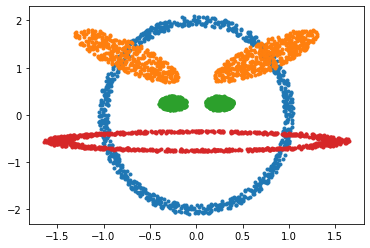

In [91]:
plt.plot(XTest[0,targetTest==0], XTest[1,targetTest==0], '.')
plt.plot(XTest[0,targetTest==1], XTest[1,targetTest==1], '.')
plt.plot(XTest[0,targetTest==2], XTest[1,targetTest==2], '.')
plt.plot(XTest[0,targetTest==3], XTest[1,targetTest==3], '.')

#plt.plot(XTest[0,targetTest!=targetEstimado], XTest[1,targetTest!=targetEstimado])
#Como o target Estimado está errdo, o plot fica estragado

In [66]:
#classificadorKNeighbours5 = KNeighborsClassifier(5)
#targetTestEstimado = classificadorKNeighbours5.predict(XTest)

#Lança erro. Outra vez.

# Pergunta 3 - Matrizes de distância:
## Considere os dados "digits" do sklearn ()
## 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
## 2. Repita a alínea anterior para a distância de cosseno

In [92]:
import sklearn.datasets as dt
import scipy.spatial.distance as spd

D=dt.load_digits()
X=D.data
target=D.target

idx = np.argsort(target)
target = target[idx]
X = X[idx, :]

D1 = spd.squareform(spd.pdist(X, metric='euclidean')) #Copiei o que fizemos em aula, mas estou a ter resultados diferentes

In [88]:
D2 = spd.squareform(spd.pdist(X, metric='cosine')) #Aqui também